## 🕺Human Action Detection


1. Importing Liabraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report , r2_score,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')

2. Importing Dataset 

In [6]:
df= pd.read_csv("/Users/karansharma/Desktop/1stop Internship/Human Action Detection/Data/time_series_data_human_activities.csv")
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [7]:
df.shape

(1073623, 6)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,1073623.0,1.880682e+01,1.028704e+01,1.000000e+00,1.000000e+01,1.900000e+01,2.800000e+01,3.600000e+01
timestamp,1073623.0,3.289157e+13,4.909825e+13,7.345234e+10,2.057092e+12,9.750603e+12,3.525530e+13,2.093974e+14
x-axis,1073623.0,6.720567e-01,6.916894e+00,-1.961000e+01,-2.960000e+00,3.400000e-01,4.520000e+00,1.995000e+01
y-axis,1073623.0,7.332700e+00,6.732950e+00,-1.961000e+01,3.340000e+00,8.010000e+00,1.160000e+01,2.004000e+01
z-axis,1073623.0,4.024567e-01,4.789301e+00,-1.980000e+01,-2.260978e+00,-4.000000e-02,2.760000e+00,1.961000e+01


In [9]:
df.info

<bound method DataFrame.info of          user  activity       timestamp  x-axis  y-axis    z-axis
0           1   Walking   4991922345000    0.69   10.80 -2.030000
1           1   Walking   4991972333000    6.85    7.44 -0.500000
2           1   Walking   4992022351000    0.93    5.63 -0.500000
3           1   Walking   4992072339000   -2.11    5.01 -0.690000
4           1   Walking   4992122358000   -4.59    4.29 -1.950000
...       ...       ...             ...     ...     ...       ...
1073618    36  Standing  15049012250000   -0.91    9.43  2.533385
1073619    36  Standing  15049062268000   -1.18    9.51  2.492524
1073620    36  Standing  15049112287000   -1.50    9.53  2.533385
1073621    36  Standing  15049162275000   -2.07    8.77  2.179256
1073622    36  Standing  15049212262000   -2.14    9.89  3.255263

[1073623 rows x 6 columns]>

In [10]:
df.columns

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')

In [11]:
df.isnull().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

In [12]:
df.duplicated().sum()

53788

In [13]:
df[df.duplicated()].head(20)


,user,activity,timestamp,x-axis,y-axis,z-axis
134,1,Walking,4998592298000,-0.99,15.75,-1.23
183,1,Walking,5001062177000,9.19,10.08,-0.08
283,1,Walking,5006032331000,3.95,5.52,-1.57
333,1,Walking,5008562146000,1.08,1.08,-1.33
567,1,Walking,5020242292000,8.28,11.41,0.00
679,1,Walking,5025842298000,-4.37,14.63,-4.56
681,1,Walking,5025943525000,-3.26,9.51,-3.49
883,1,Walking,5036042341000,4.02,7.63,-1.46
967,1,Walking,5040242292000,3.02,10.73,-1.57
1182,1,Walking,5050992322000,3.64,11.73,5.24


In [14]:
dupes_by_time = df[df.duplicated(subset=['timestamp'])]
print("Duplicates only by time:", len(dupes_by_time))


Duplicates only by time: 78946


In [15]:
print("Before removal:\n", df['activity'].value_counts())
print("\nAfter removal:\n", df.drop_duplicates()['activity'].value_counts())


Before removal:
 activity
Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: count, dtype: int64

After removal:
 activity
Walking       401511
Jogging       297463
Upstairs      118922
Downstairs     97381
Sitting        57315
Standing       47243
Name: count, dtype: int64


In [16]:
# Check if duplicates are exact across all columns
df[df.duplicated(keep=False)].head(10)

# Or check only on important columns
df[df.duplicated(subset=["user", "activity", "timestamp", "x-axis", "y-axis", "z-axis"], keep=False)].head(10)


,user,activity,timestamp,x-axis,y-axis,z-axis
133,1,Walking,4998592298000,-0.99,15.75,-1.23
134,1,Walking,4998592298000,-0.99,15.75,-1.23
182,1,Walking,5001062177000,9.19,10.08,-0.08
183,1,Walking,5001062177000,9.19,10.08,-0.08
282,1,Walking,5006032331000,3.95,5.52,-1.57
283,1,Walking,5006032331000,3.95,5.52,-1.57
332,1,Walking,5008562146000,1.08,1.08,-1.33
333,1,Walking,5008562146000,1.08,1.08,-1.33
566,1,Walking,5020242292000,8.28,11.41,0.00
567,1,Walking,5020242292000,8.28,11.41,0.00


In [17]:
df = df.drop_duplicates()

print("Remaining rows:", df.shape[0])


Remaining rows: 1019835


In [18]:
df.shape

(1019835, 6)

In [19]:
print(df.dtypes)

user           int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object


3. EDA

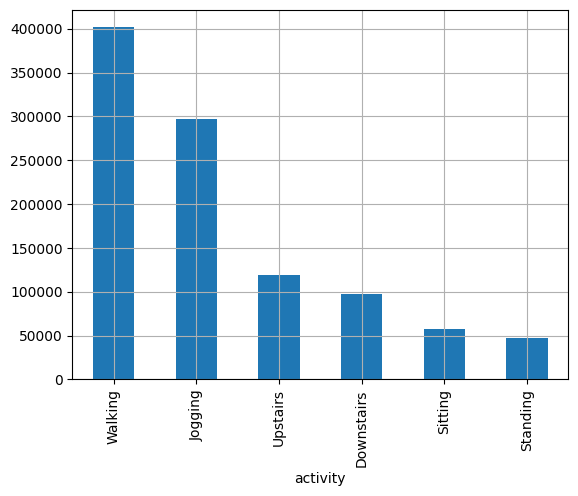

activity
Walking       401511
Jogging       297463
Upstairs      118922
Downstairs     97381
Sitting        57315
Standing       47243
Name: count, dtype: int64


In [20]:
activity_stats = df.activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

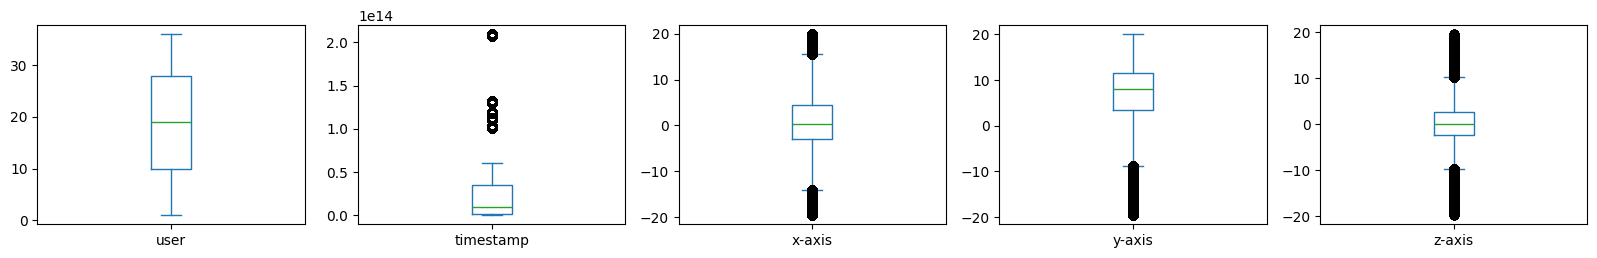

In [21]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,15))
plt.show()

In [22]:
pd.crosstab(df.user, df.activity)


activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2909,10871,0,0,3095,12759
2,0,11664,0,0,0,11649
3,3261,10857,1547,2721,3359,12801
4,1737,884,1204,0,1348,6015
5,3159,6295,1571,1474,3015,12013
6,1402,9658,1568,698,1636,11827
7,2211,8933,2458,2330,3551,10780
8,3247,9975,2574,3204,4358,16802
9,0,0,0,0,0,12801


In [23]:
sel_user = 3
df_user = df[df.user==sel_user]

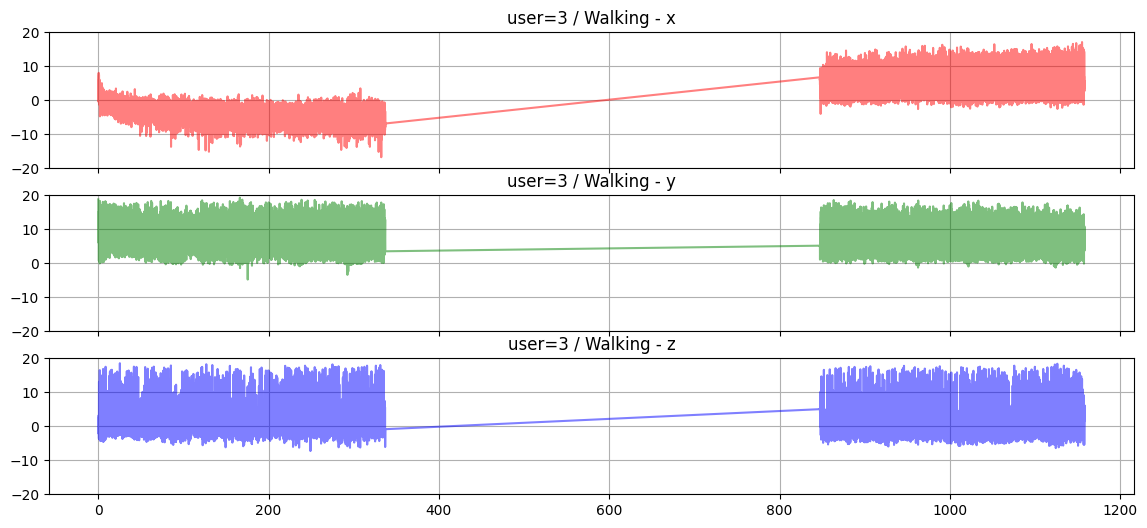

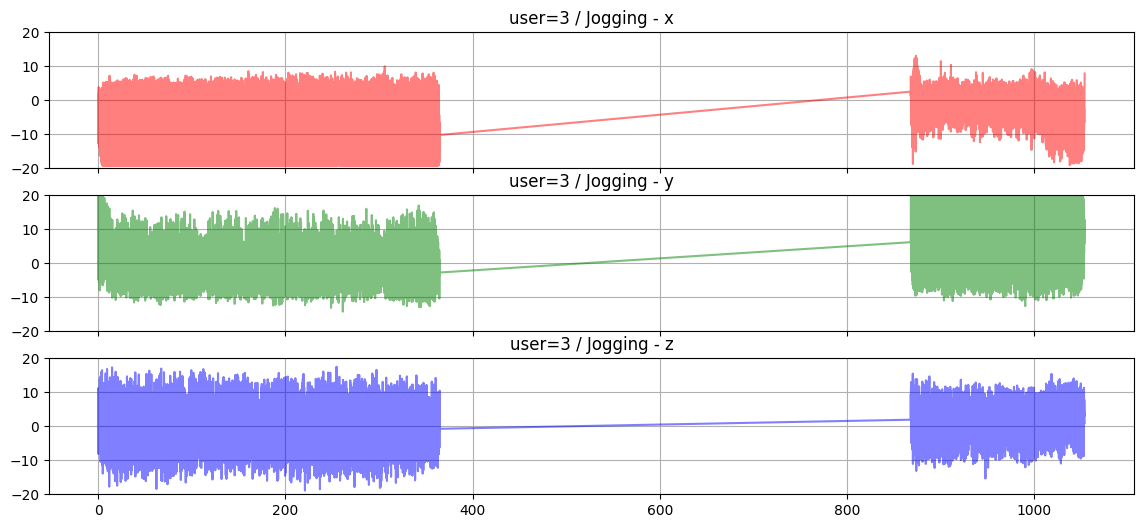

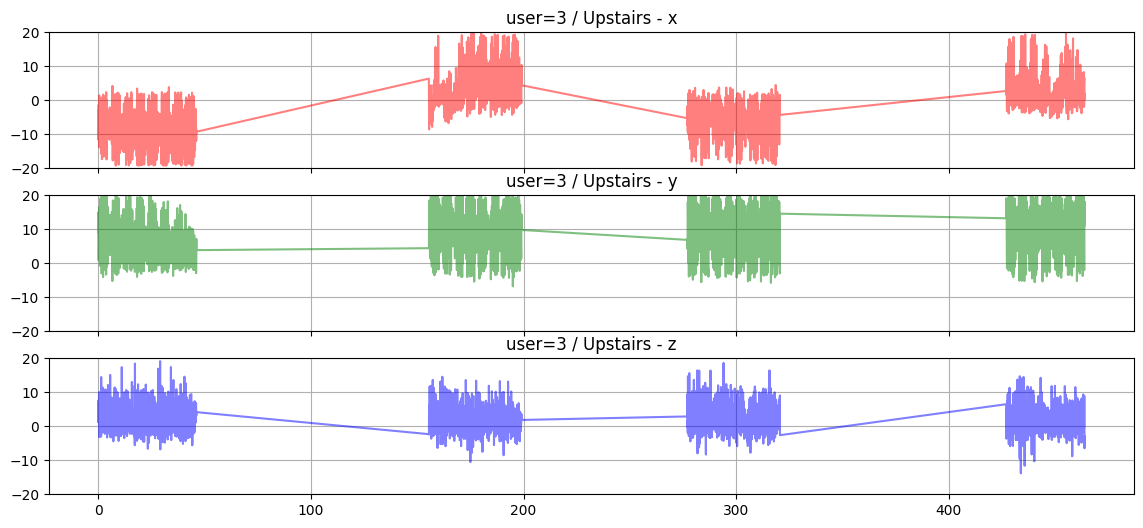

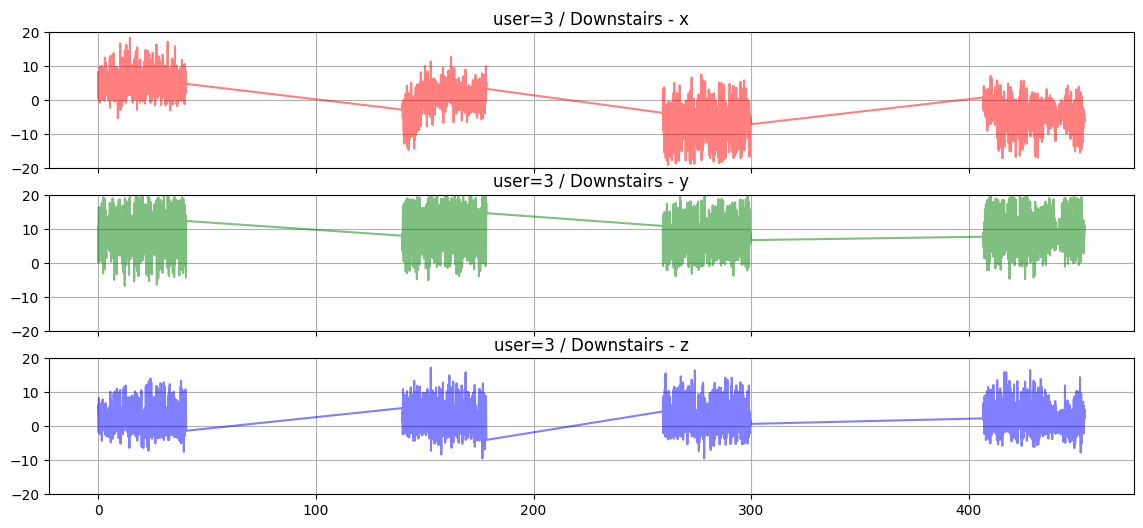

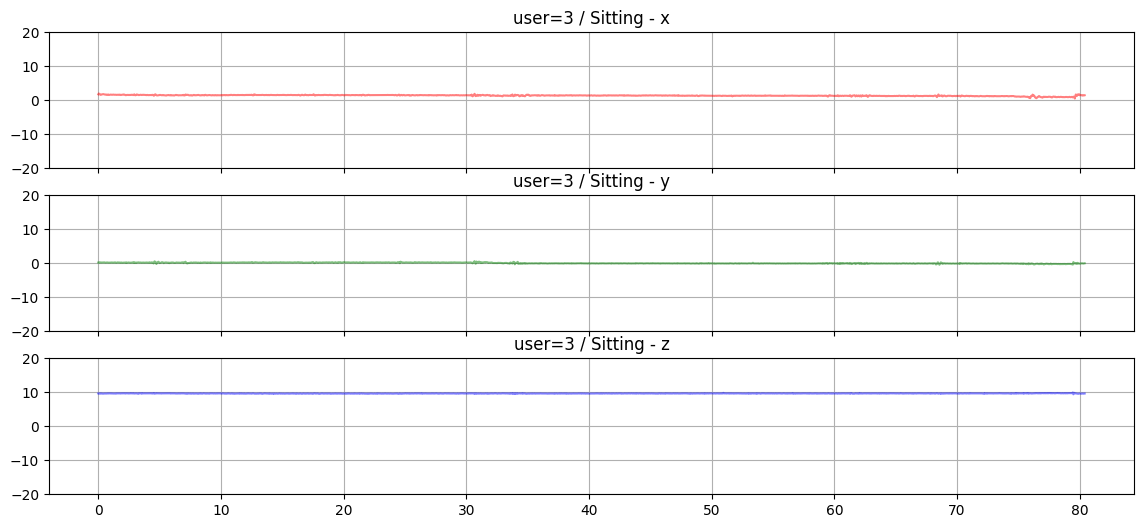

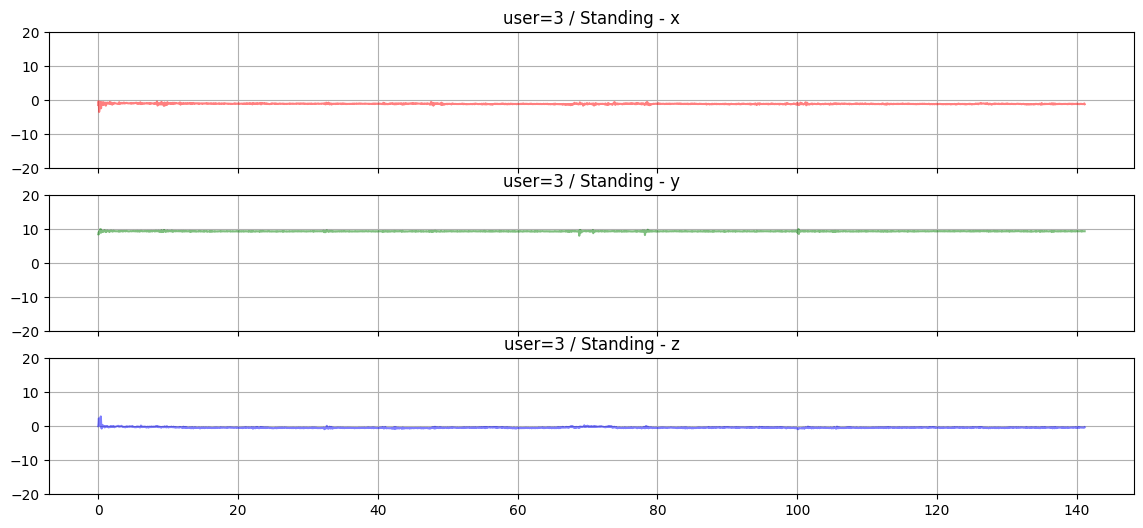

In [24]:
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.plot(df_temp['time_sec'], df_temp['x-axis'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(df_temp['time_sec'], df_temp['y-axis'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(df_temp['time_sec'], df_temp['z-axis'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

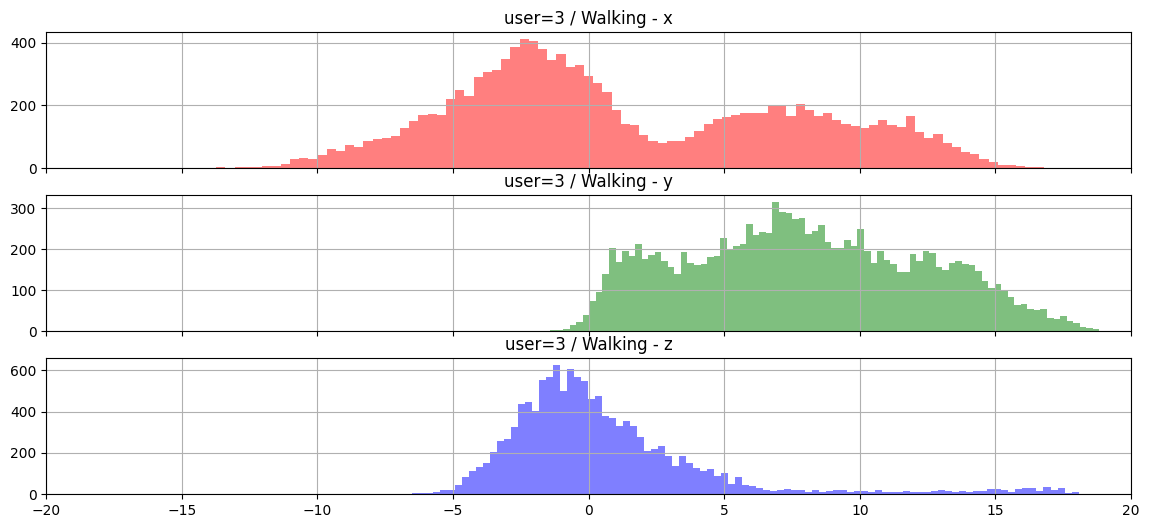

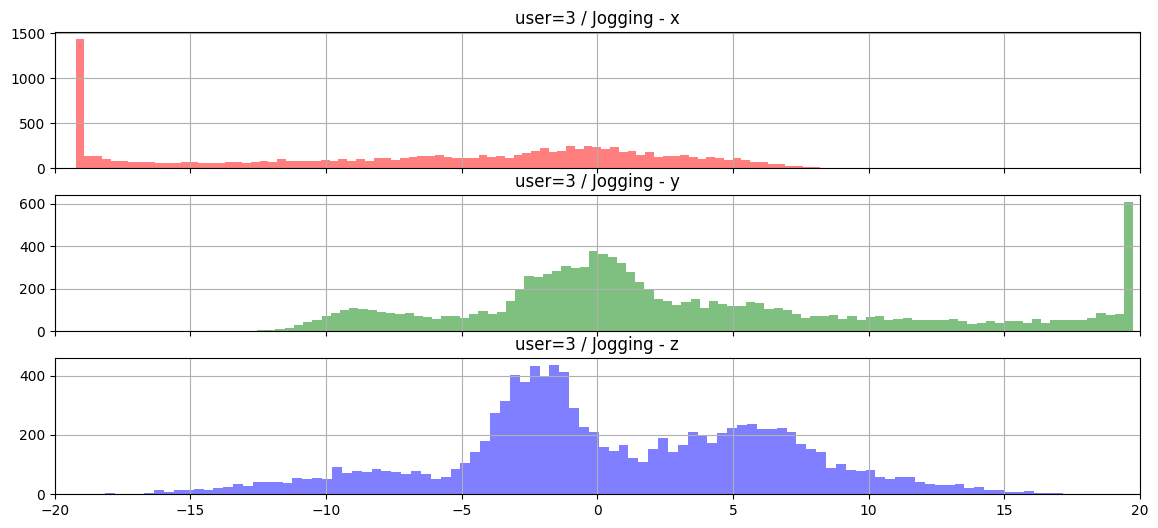

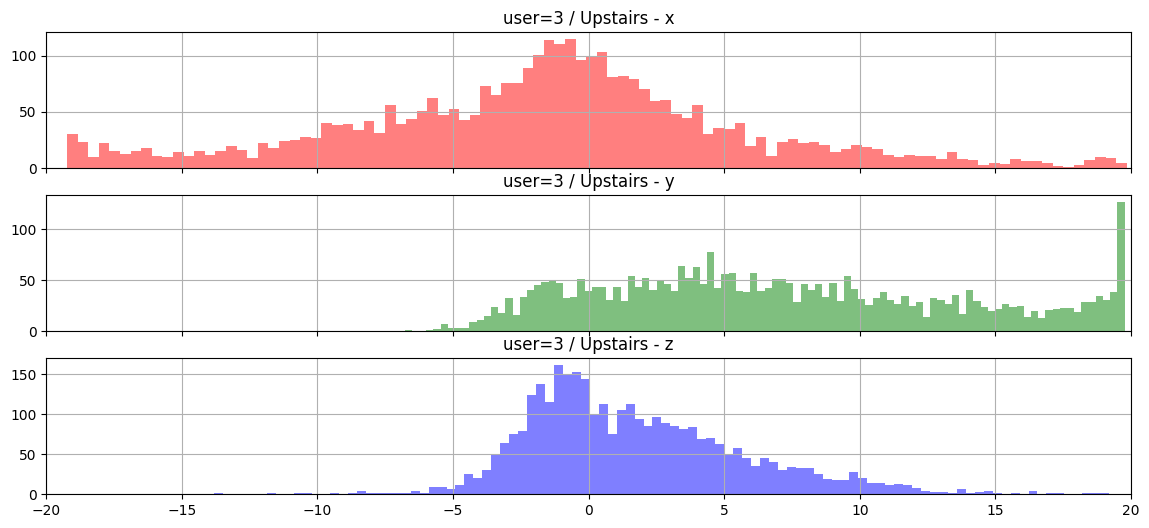

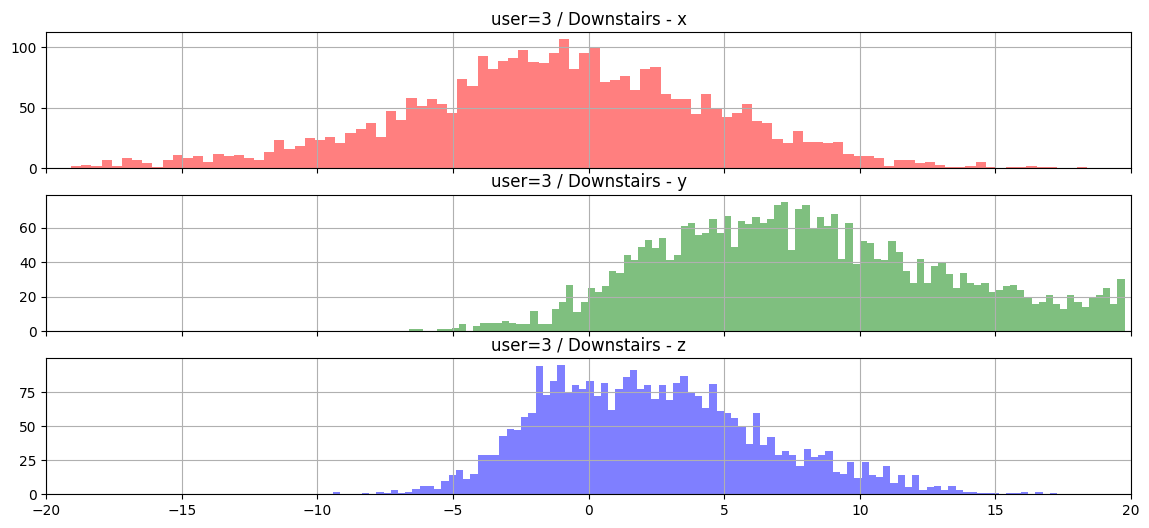

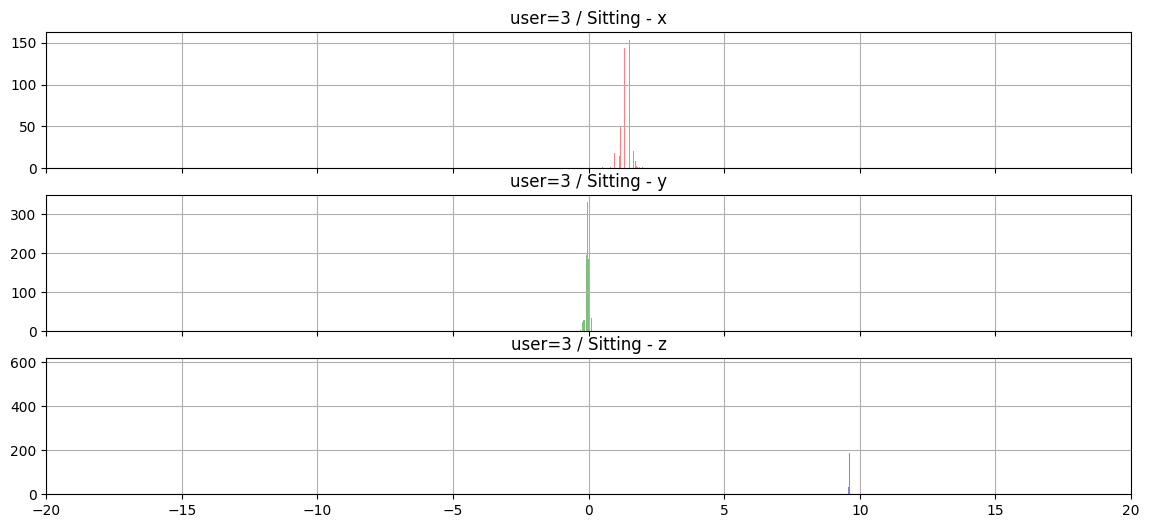

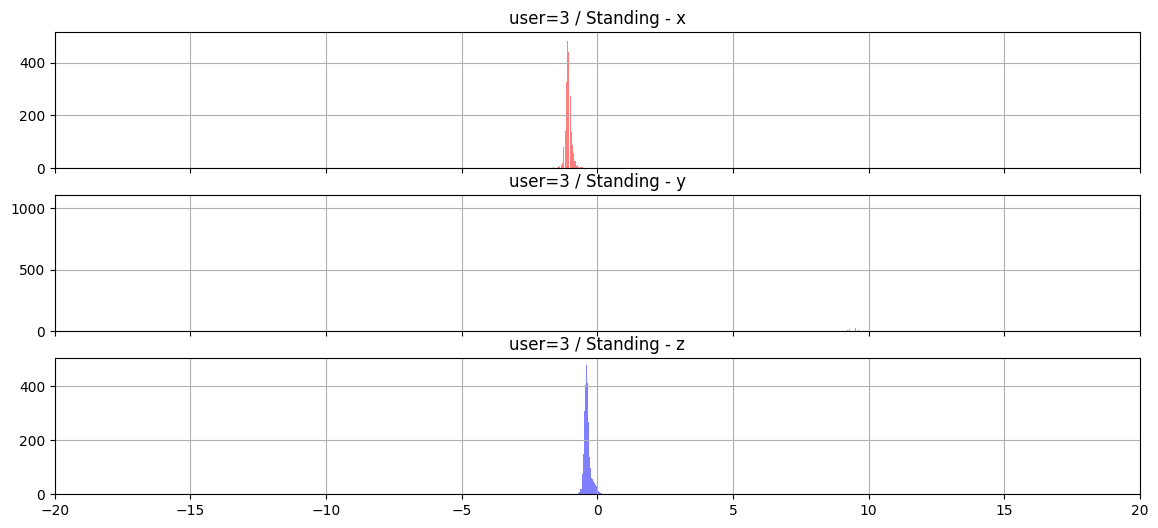

In [25]:
n_bins = 100

for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.hist(df_temp['x-axis'], bins=n_bins, color='red', alpha=0.5)
    ax1.set_xlim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.hist(df_temp['y-axis'], bins=n_bins, color='green', alpha=0.5)
    ax2.set_xlim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.hist(df_temp['z-axis'], bins=n_bins, color='blue', alpha=0.5)
    ax3.set_xlim(-20,20)
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    plt.show()

Walking :


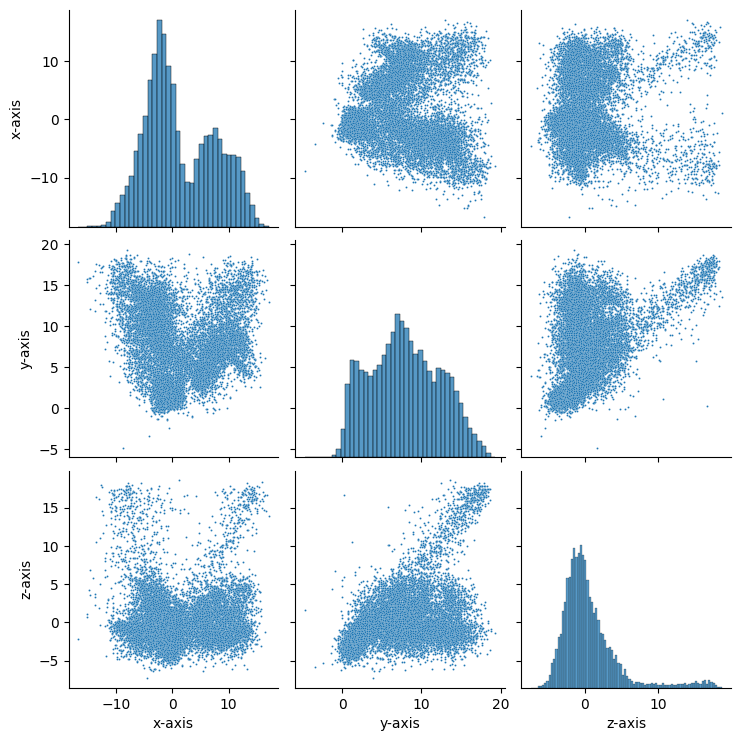

Jogging :


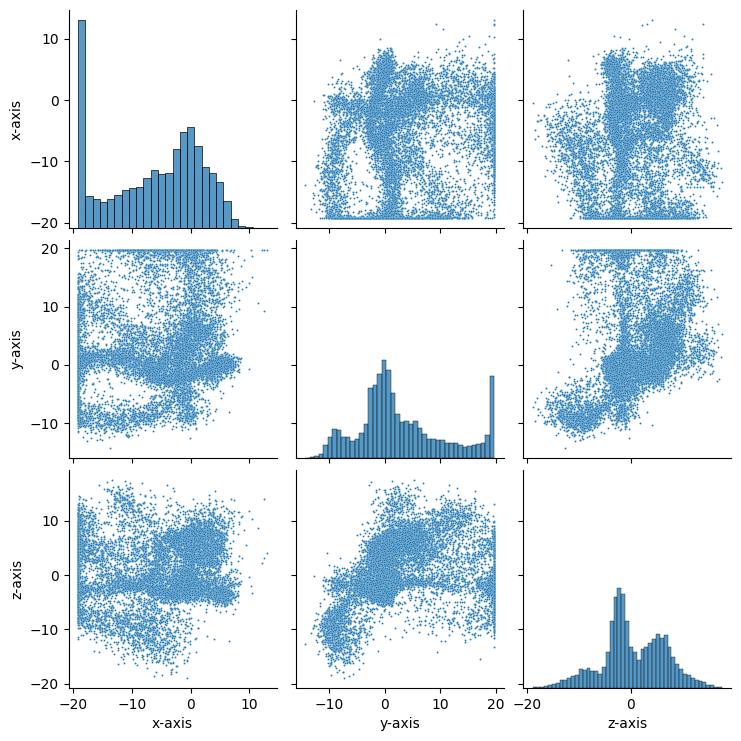

Upstairs :


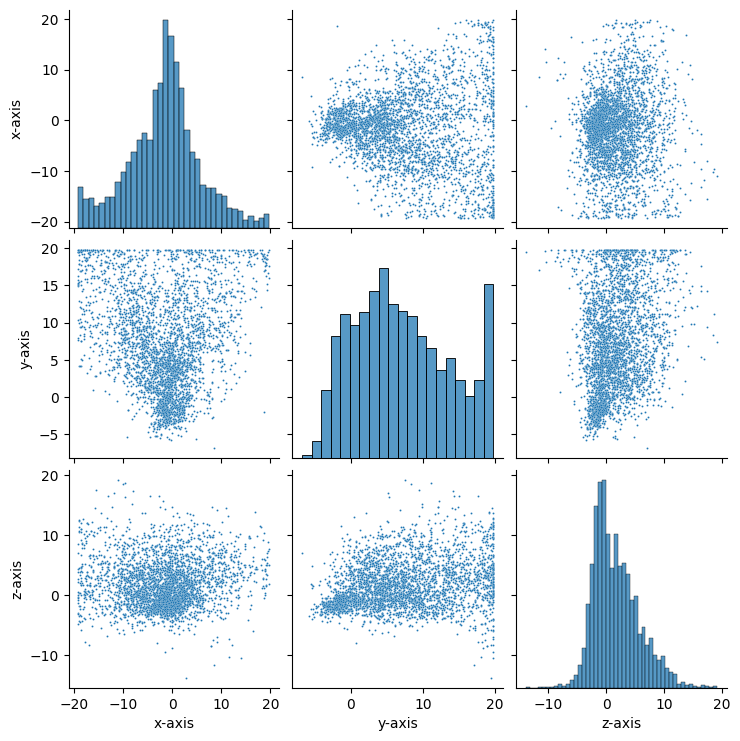

Downstairs :


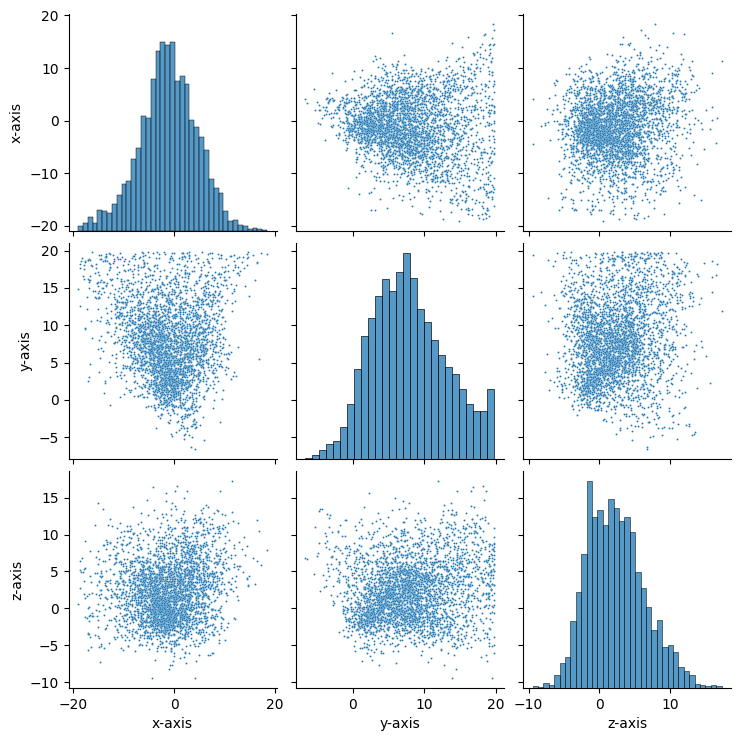

Sitting :


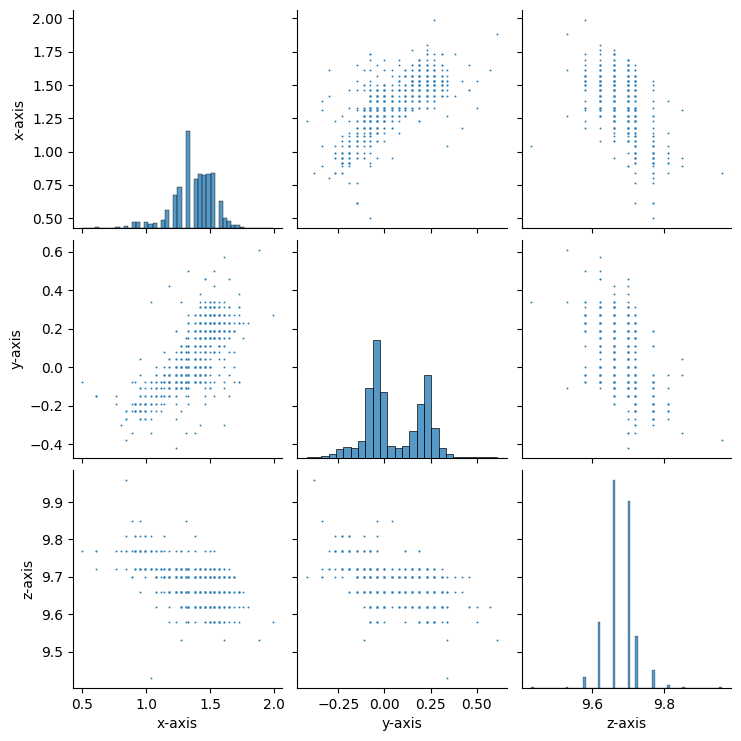

Standing :


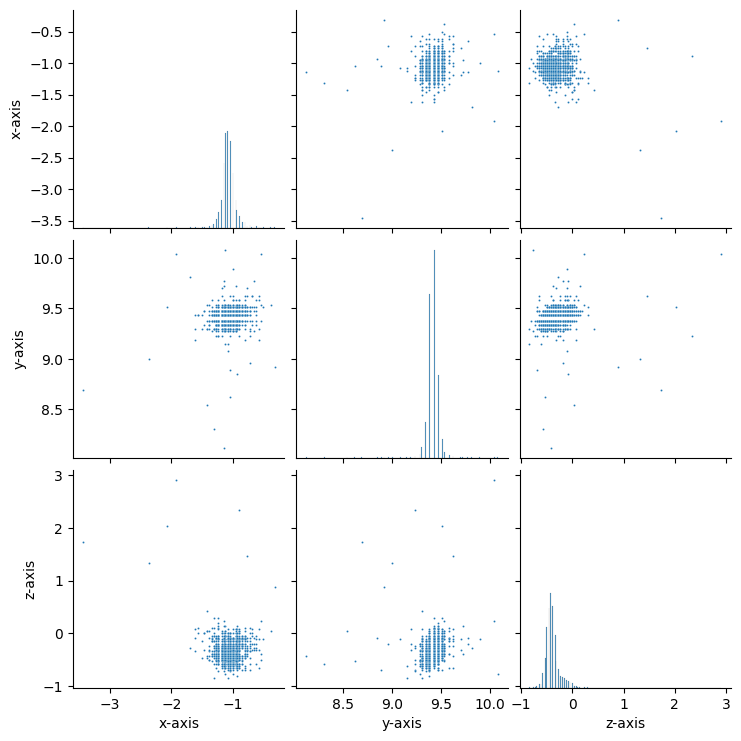

In [26]:
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    print(act,':')
    sns.pairplot(data = df_temp[['x-axis','y-axis','z-axis']],
                 plot_kws = dict(s=2))
    plt.show()

In [27]:
stats_by_act = df_user.groupby('activity')[['x-axis','y-axis','z-axis']].std()
stats_by_act

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.740523,5.218055,4.073141
Jogging,8.124977,7.960581,6.021869
Sitting,0.163681,0.150042,0.040301
Standing,0.125637,0.074936,0.177126
Upstairs,7.323251,6.635845,3.981727
Walking,6.187522,4.394125,3.913868


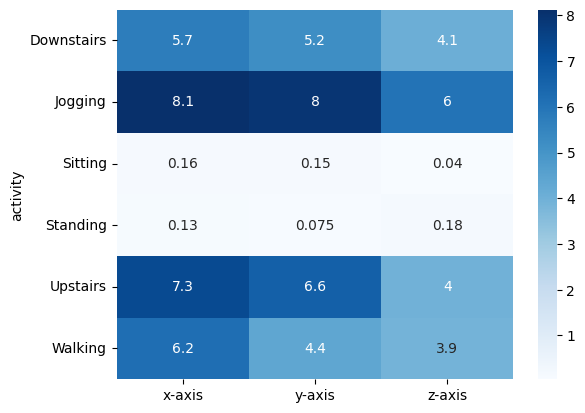

In [28]:
sns.heatmap(stats_by_act, annot=True,cmap="Blues")
plt.show()

In [29]:
stats_full = df.groupby(['activity','user'], 
                        as_index=False)[['x-axis','y-axis','z-axis']].std()

In [30]:
pd.set_option('display.max_rows', 200)
stats_full

,activity,user,x-axis,y-axis,z-axis
0,Downstairs,1,8.067358,4.763271,3.976474
1,Downstairs,3,5.740523,5.218055,4.073141
2,Downstairs,4,4.148238,3.836219,3.758693
3,Downstairs,5,3.133133,4.172457,2.690936
4,Downstairs,6,2.724304,3.751106,2.120559
5,Downstairs,7,5.177109,5.041849,2.801006
6,Downstairs,8,5.268374,4.503151,2.882951
7,Downstairs,10,3.569482,4.188303,4.209029
8,Downstairs,11,3.652334,9.981080,2.351165
9,Downstairs,12,3.808632,5.475724,4.669600


<Axes: ylabel='count'>

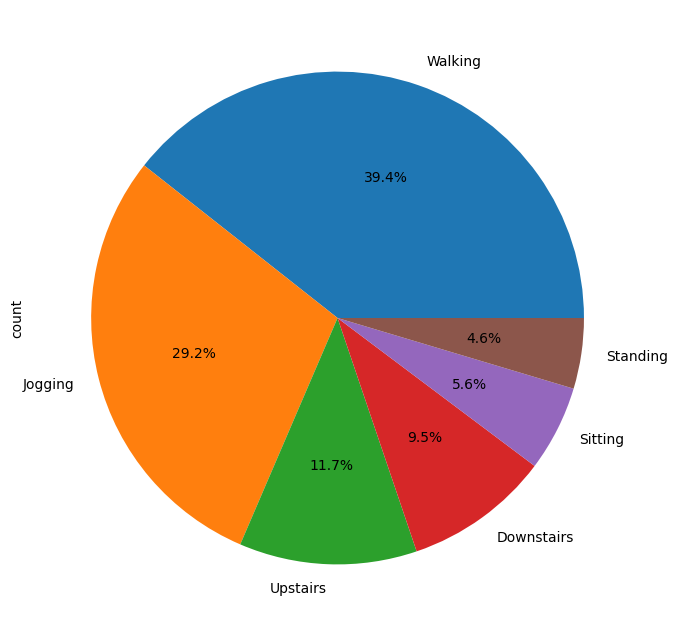

In [31]:
plt.figure(figsize=(12,8))
round(df['activity'].value_counts()/df.shape[0]*100,2).plot.pie(autopct='%2.1f%%')

In [32]:
fig = px.scatter_3d(data_frame=stats_full,
                    x='x-axis', y='y-axis', z='z-axis',
                    color='activity',
                    opacity=0.30)
fig.update_layout(title='')
fig.show()

In [33]:
stats_full_mean_std = stats_full.groupby('activity')[['x-axis','y-axis','z-axis']].mean()
stats_full_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,4.251715,4.539508,3.240554
Jogging,8.061932,8.376011,5.580656
Sitting,0.317110,0.286189,0.290278
Standing,0.497273,0.295321,0.499658
Upstairs,4.202320,4.311077,3.111944
Walking,4.607709,4.507017,3.709941


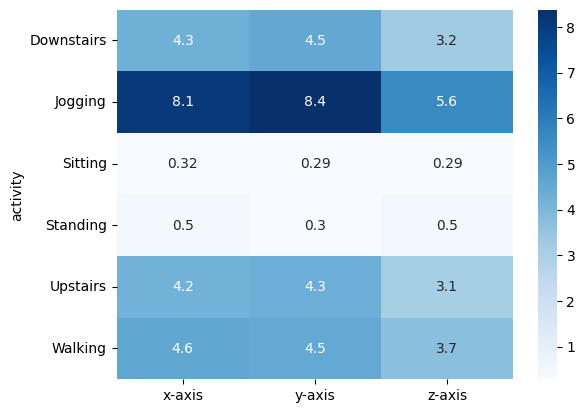

In [34]:
sns.heatmap(stats_full_mean_std,
            annot=True, cmap="Blues")
plt.show()

In [35]:
# a) Magnitude of acceleration
df['magnitude'] = np.sqrt(df['x-axis']**2 + df['y-axis']**2 + df['z-axis']**2)

# b) Rolling window statistics
window_size = 20  # adjust based on sampling rate

for col in ['x-axis', 'y-axis', 'z-axis', 'magnitude']:
    df[f'{col}_mean'] = df[col].rolling(window=window_size).mean()
    df[f'{col}_std'] = df[col].rolling(window=window_size).std()

# Remove rows with NaN (from rolling)
df = df.dropna().reset_index(drop=True)


In [36]:
le = LabelEncoder()
df['activity']= le.fit_transform(df['activity'])

In [37]:
feature_cols = [c for c in df.columns if ('mean' in c or 'std' in c)]
X = df[feature_cols]
y = df['activity']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
def resultsSummarizer (y_true, y_pred,cm_en=True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = sensitivity = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    if cm_en:
        plt.figure(figsize=(15,15))
        sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels=le.classes_,
            yticklabels=le.classes_)

        plt.title( 'Confusion Matrix')
        plt.show()

    print(f'Accuracy_score: {acc*100:.4f}%')
    print(f'Precision_score: {prec*100:.4f}%')
    print(f'Recall_score: {rec*100:.4f}%')
    print(f'F1_score: {f1*100:.4f}%')






In [41]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [42]:
lr.score(X_train,y_train)

0.7781239734657757

In [43]:
lr.score(X_test,y_test)

0.7782942087819419

In [44]:
lr2=LogisticRegression()
lr2.fit(X_train_scaled , y_train)

LogisticRegression()

In [45]:
lr2.score(X_train_scaled,y_train)

0.7863950814608532

In [46]:
lr2.score(X_test_scaled,y_test)

0.7865897903551607

In [47]:
y_pred_lr=lr2.predict(X_test_scaled)

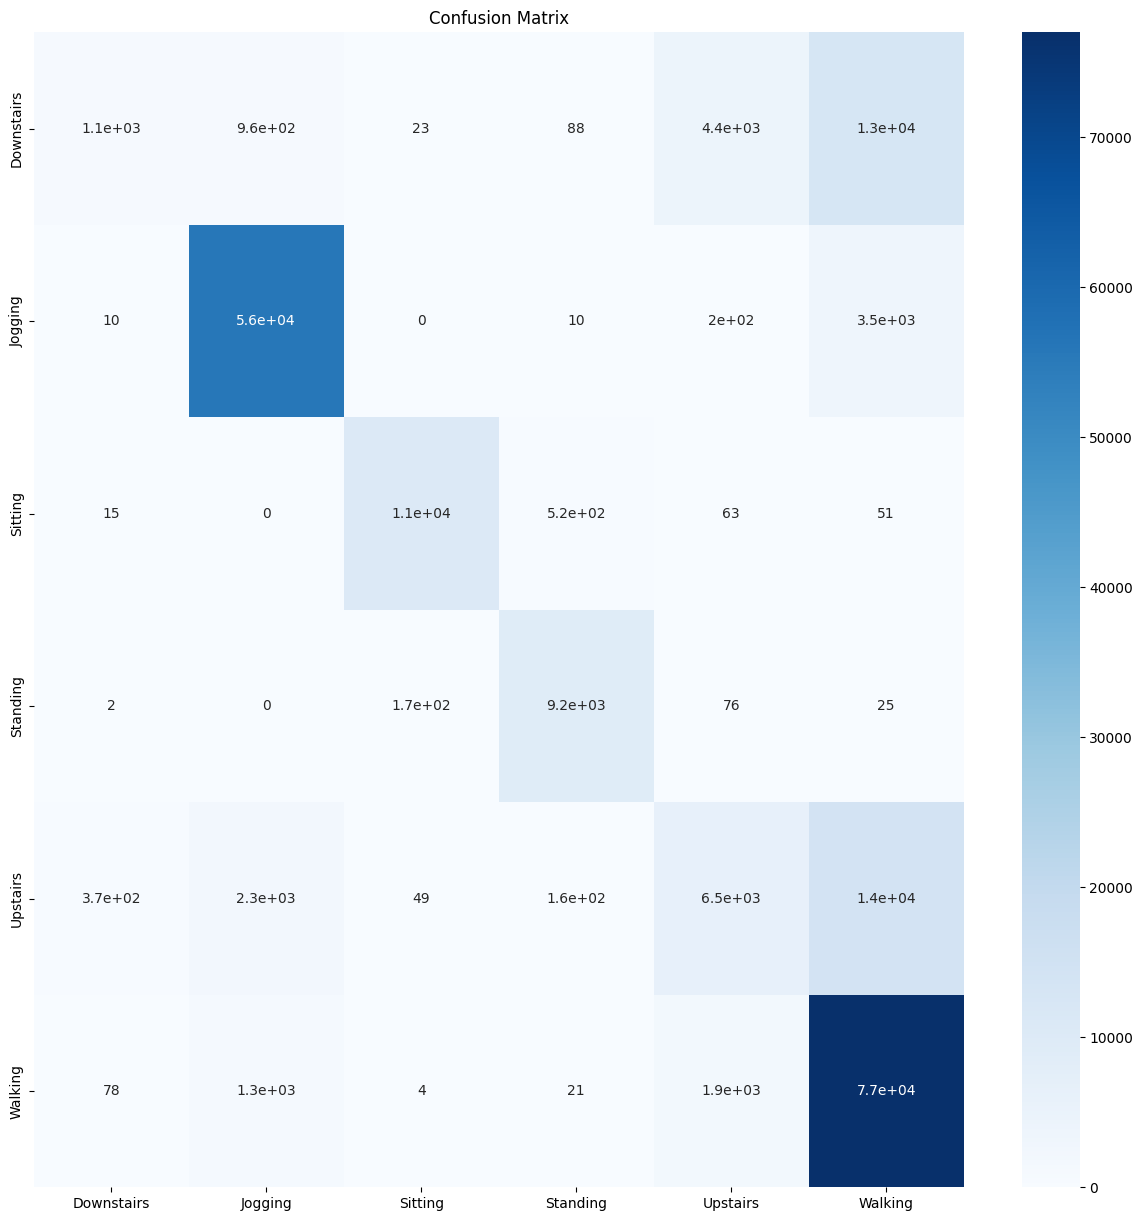

Accuracy_score: 78.6590%
Precision_score: 78.9334%
Recall_score: 69.0751%
F1_score: 68.6030%


In [48]:
resultsSummarizer(y_test, y_pred_lr)

In [49]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred_knn = knn1.predict(X_test)

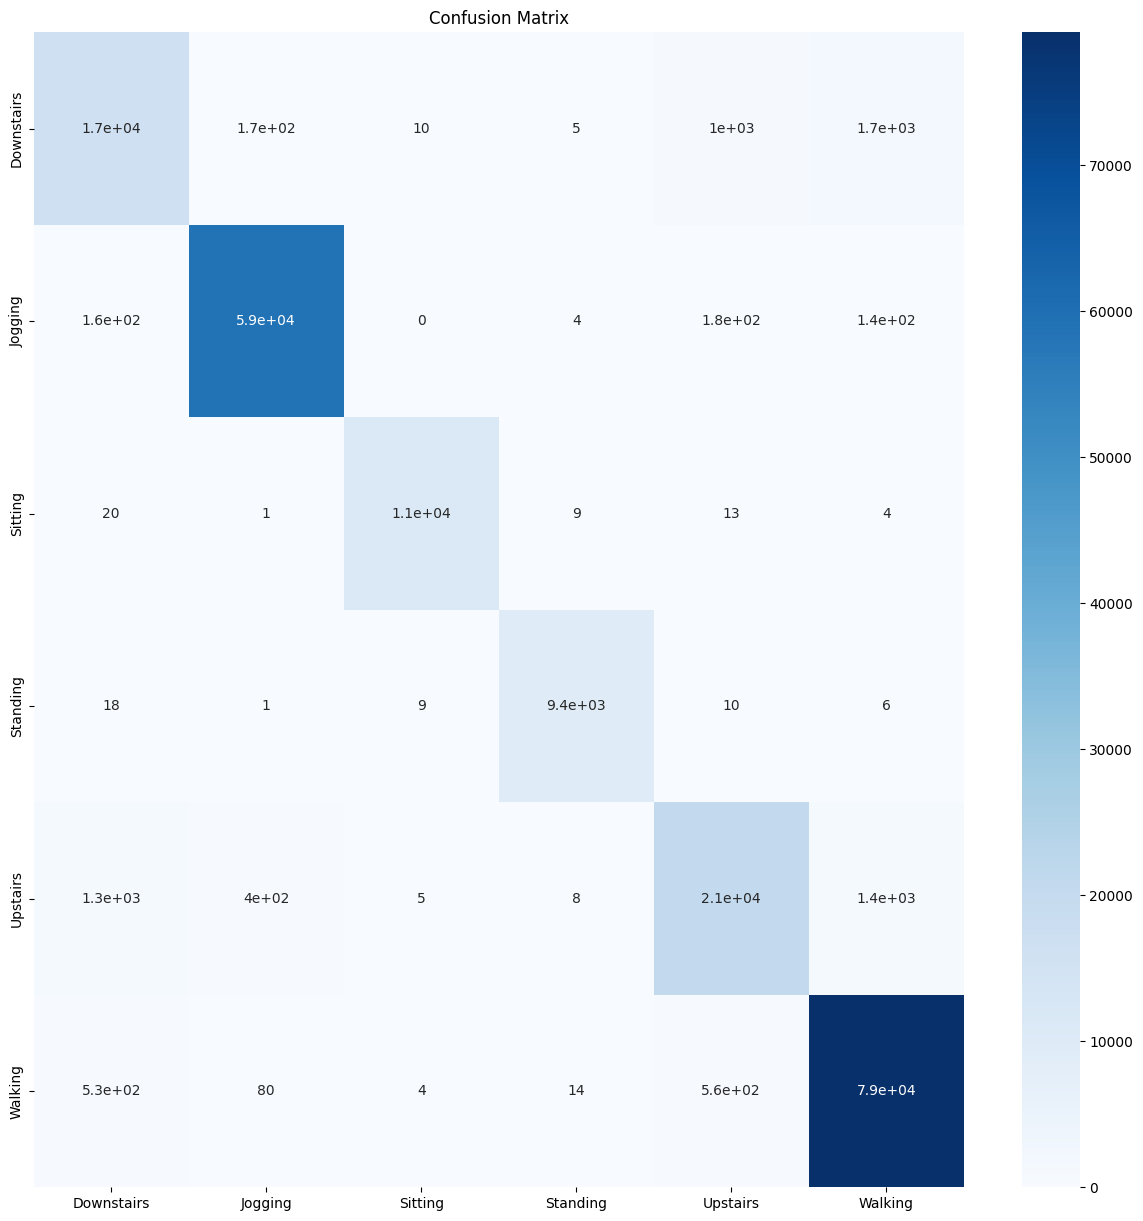

Accuracy_score: 96.2273%
Precision_score: 95.9397%
Recall_score: 94.8719%
F1_score: 95.3847%


In [51]:
resultsSummarizer(y_test,y_pred_knn)

In [52]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled,y_train)
y_pred_knn2=knn2.predict(X_test_scaled) 
resultsSummarizer(y_test,y_pred_knn2,cm_en=False)

Accuracy_score: 96.1606%
Precision_score: 95.8584%
Recall_score: 94.7960%
F1_score: 95.3061%


In [53]:
for n in range(1,6):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    print(f"\n============No. of neighbors: {n}=============\n")
    resultsSummarizer(y_test,y_pred,cm_en=False)


============No. of neighbors: 1=============

Accuracy_score: 97.2275%
Precision_score: 96.8902%
Recall_score: 96.5091%
F1_score: 96.6970%

============No. of neighbors: 2=============

Accuracy_score: 96.4626%
Precision_score: 95.5220%
Recall_score: 96.1888%
F1_score: 95.8030%

============No. of neighbors: 3=============

Accuracy_score: 96.6259%
Precision_score: 96.2973%
Recall_score: 95.5297%
F1_score: 95.9015%

============No. of neighbors: 4=============

Accuracy_score: 96.3562%
Precision_score: 95.7735%
Recall_score: 95.4287%
F1_score: 95.5818%

============No. of neighbors: 5=============

Accuracy_score: 96.1606%
Precision_score: 95.8584%
Recall_score: 94.7960%
F1_score: 95.3061%


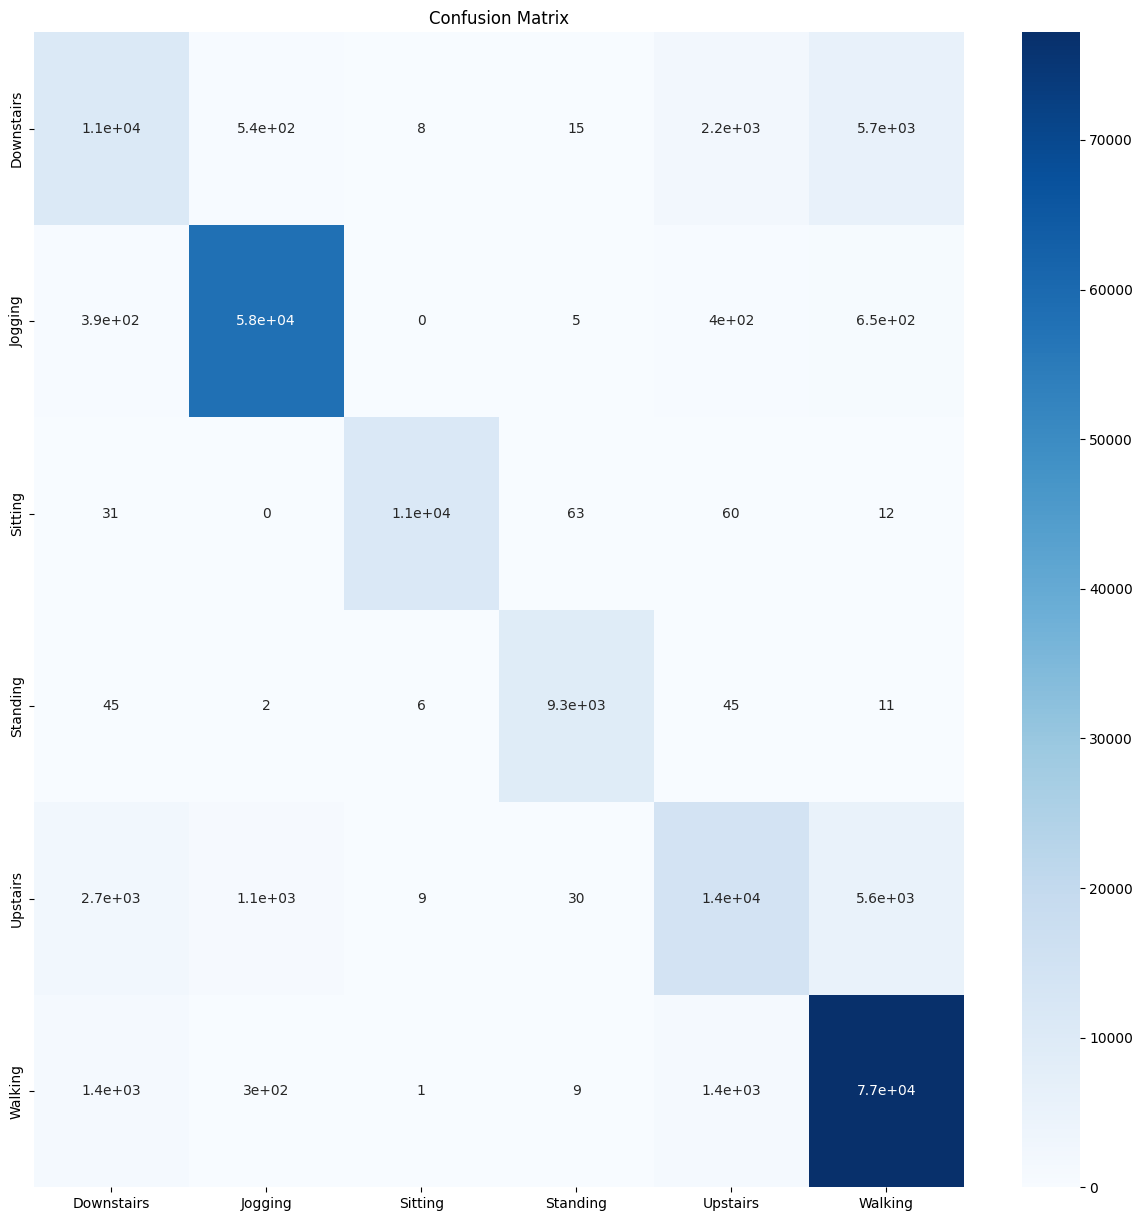

Accuracy_score: 88.8431%
Precision_score: 88.3812%
Recall_score: 84.6347%
F1_score: 86.1475%


In [54]:
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
resultsSummarizer(y_test,y_pred_dt)

In [55]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],  # logistic regression penalty
            'solver': ['lbfgs']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


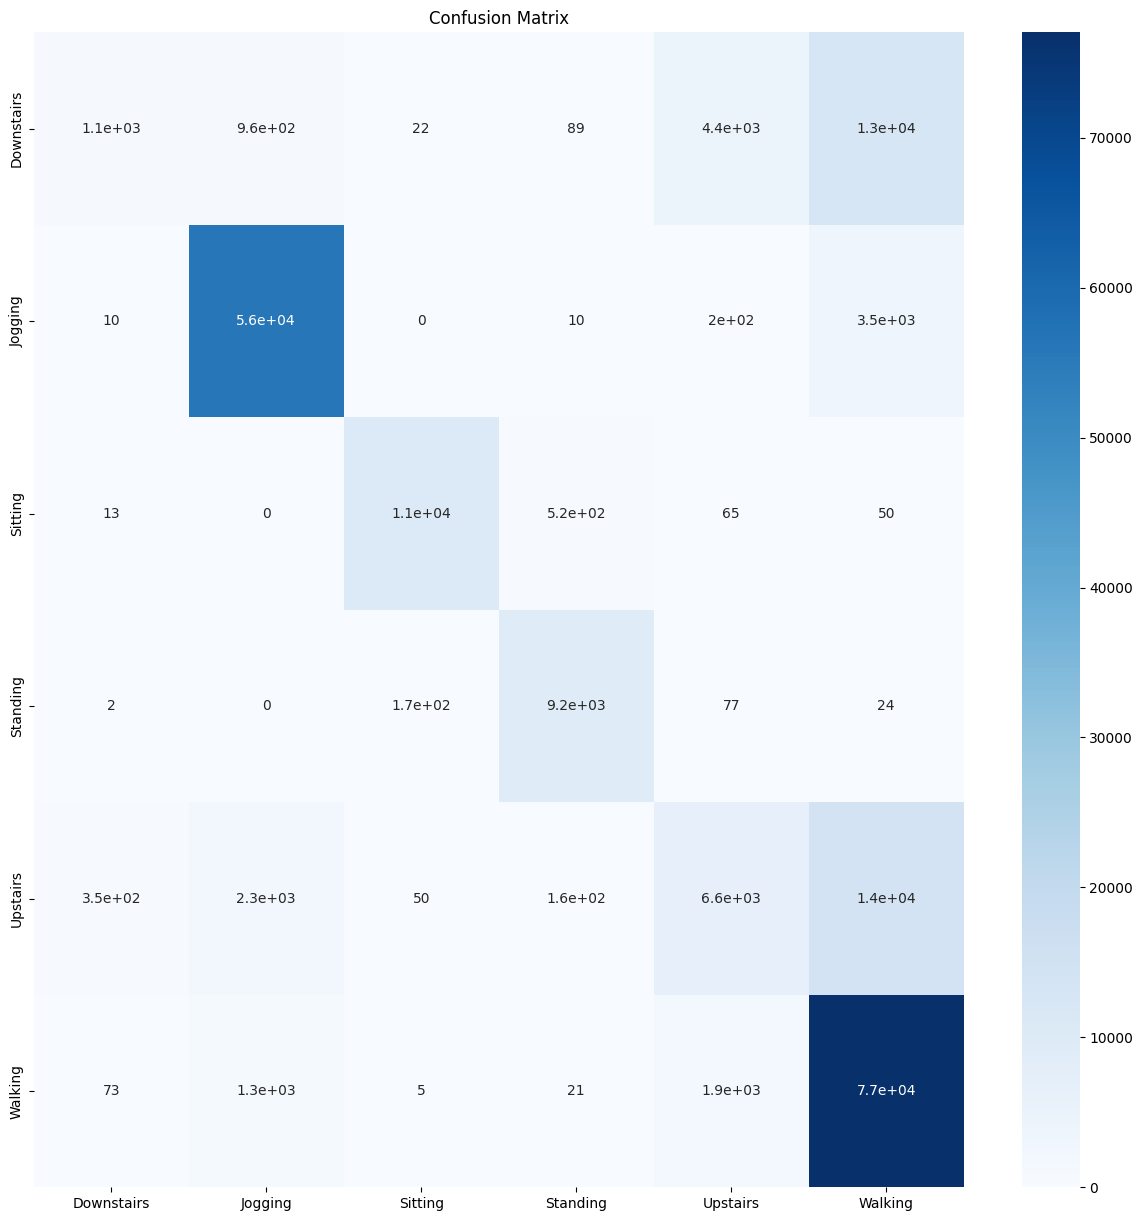

Accuracy_score: 78.6560%
Precision_score: 79.0997%
Recall_score: 69.0572%
F1_score: 68.5782%
Training KNeighborsClassifier...
Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


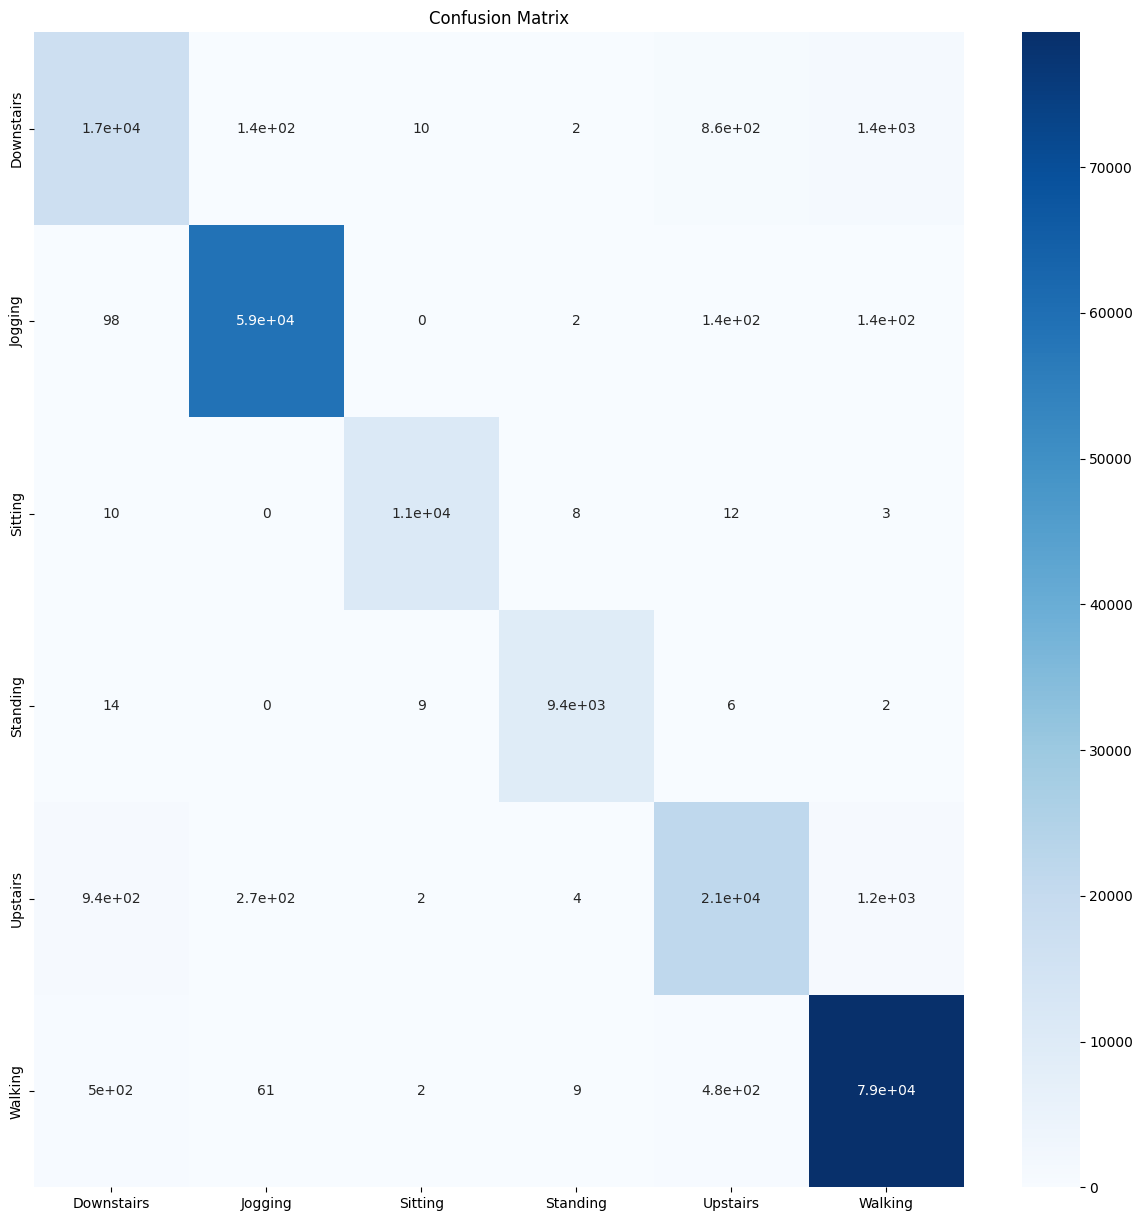

Accuracy_score: 96.9151%
Precision_score: 96.7471%
Recall_score: 95.8452%
F1_score: 96.2819%
Training DecisionTreeClassifier...
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


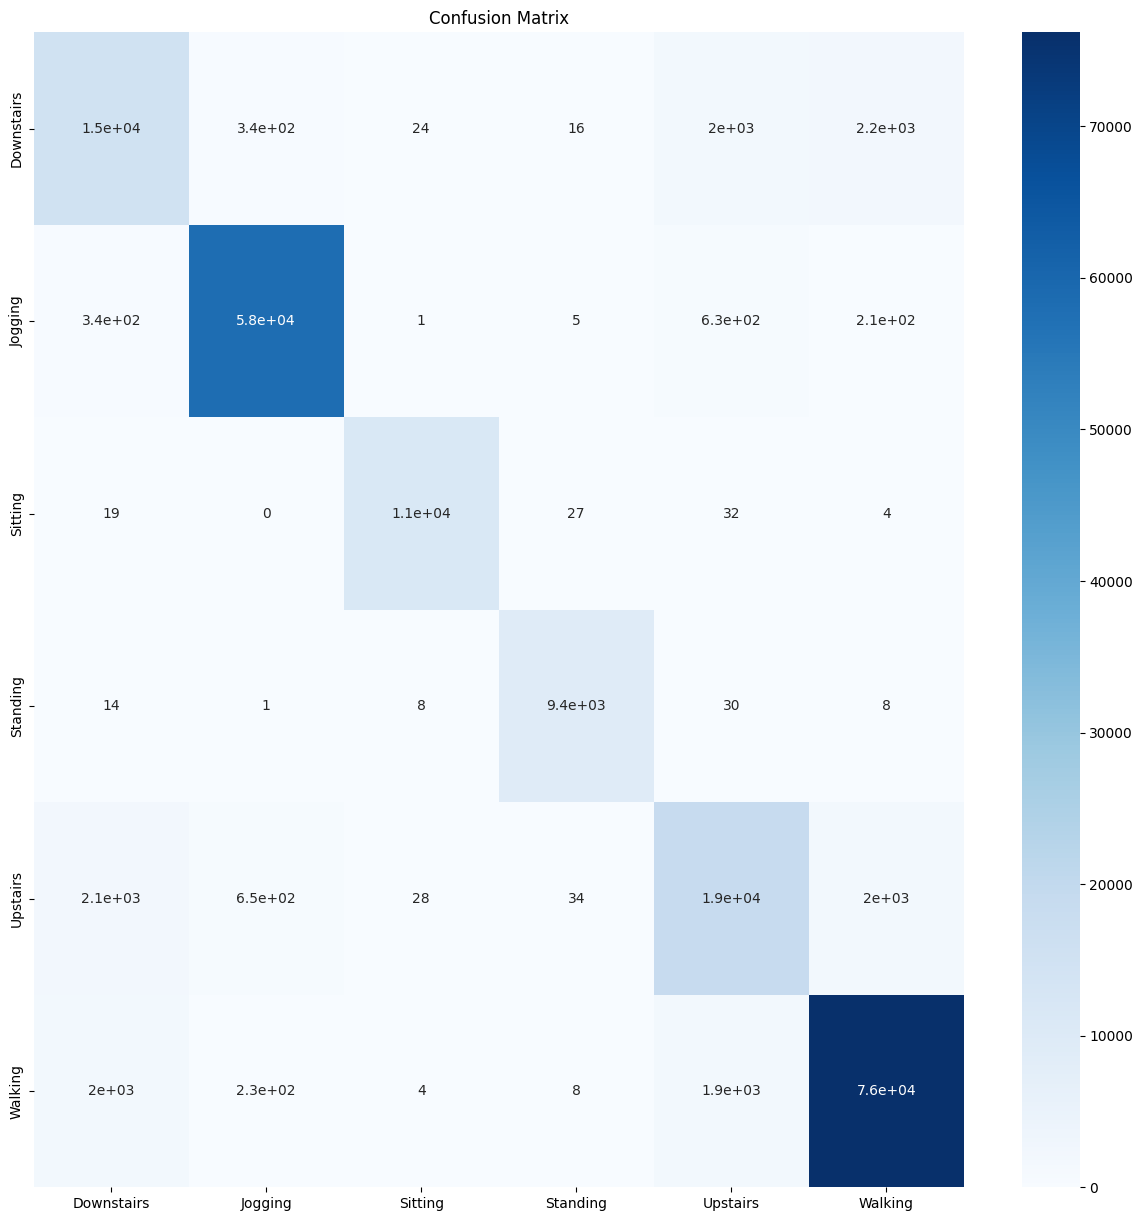

Accuracy_score: 92.7502%
Precision_score: 91.4168%
Recall_score: 91.3207%
F1_score: 91.3683%


In [56]:
from sklearn.model_selection import GridSearchCV

for model_name, mp in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_scaled, y_train)
    
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    y_pred = clf.predict(X_test_scaled)
    resultsSummarizer(y_test, y_pred, cm_en=True)


In [57]:
results = {}
for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[model_name] = {
        'best_params': clf.best_params_,
        'test_accuracy': acc
    }


In [58]:
print(results)

{'LogisticRegression': {'best_params': {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}, 'test_accuracy': 0.7865603733992274}, 'KNeighborsClassifier': {'best_params': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}, 'test_accuracy': 0.9691514188778412}, 'DecisionTreeClassifier': {'best_params': {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}, 'test_accuracy': 0.9275019121021356}}
